# IMPORTING NECESSARY LIBRARIES

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

# LOADING THE DATASET

In [78]:
df=pd.read_csv(r"C:\Users\ayush\OneDrive\Documents\Internship Project - Ayush\TMDB_movie_dataset_v11.csv")
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233745,780756,I Want You,0.000,0,Released,2011-01-01,0,114,True,NaN,...,I Want You,"A shared glass of wine, a picnic, a passionate...",0.600,/faxBMjLuHLVqX8VzKPiWTTs7KVi.jpg,NaN,NaN,Falcon Studios,United States of America,English,gay pornography
1233746,780757,Osudná chvíle,0.000,0,Released,1935-09-20,0,0,False,NaN,...,Osudná chvíle,NaN,0.600,NaN,NaN,"Drama, Romance",P. D. C.,Czechoslovakia,Czech,"educational, sexually transmitted disease"
1233747,780760,HATSUNE MIKU LIVE - UNTITLED 0 -,0.000,0,Released,2020-08-09,0,75,False,NaN,...,HATSUNE MIKU LIVE - UNTITLED 0 -,Hatsune Miku with the other Piapro Characters ...,0.600,/1QfBjFbUJxcyHqWqxD5pnZTlzPN.jpg,NaN,NaN,Crypton Future Media,Japan,Japanese,NaN
1233748,780762,Merangkul Jarak,0.000,0,Released,2020-12-29,0,25,False,NaN,...,Merangkul Jarak,"Randi, a freelance filmmaker from Bandung, fee...",0.600,/1IvqD8Y0OOtyBCrCHJR3AeD3wGY.jpg,NaN,Drama,"Kinovia, Cine Crib",Indonesia,Indonesian,"dream, filmmaking, distance"


# DATA HANDLING

Checking for missing values and filling it.

In [79]:
df.isna().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             229705
revenue                       0
runtime                       0
adult                         0
backdrop_path            914084
budget                        0
homepage                1104599
imdb_id                  608516
original_language             0
original_title               13
overview                 262954
popularity                    0
poster_path              407757
tagline                 1060574
genres                   513627
production_companies     688744
production_countries     567357
spoken_languages         545335
keywords                 911505
dtype: int64

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
for i in ('genres','status','release_date','backdrop_path','homepage','imdb_id','original_language','original_title','overview','poster_path','tagline','spoken_languages','keywords'):
    df[i]=df[i].fillna('Unknown')

In [82]:
for i in ('title','production_companies','production_countries'):
    df[i]=df[i].fillna('Unknown')

In [83]:
df.isna().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
backdrop_path           0
budget                  0
homepage                0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
tagline                 0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
dtype: int64

# STATISTICAL ANALYSIS

In [84]:
df[['budget', 'revenue']].describe()

,budget,revenue
count,1.233375e+06,1.233375e+06
mean,2.583367e+05,6.649419e+05
std,5.153373e+06,1.831801e+07
min,0.000000e+00,-1.200000e+01
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+09,5.000000e+09


In [85]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

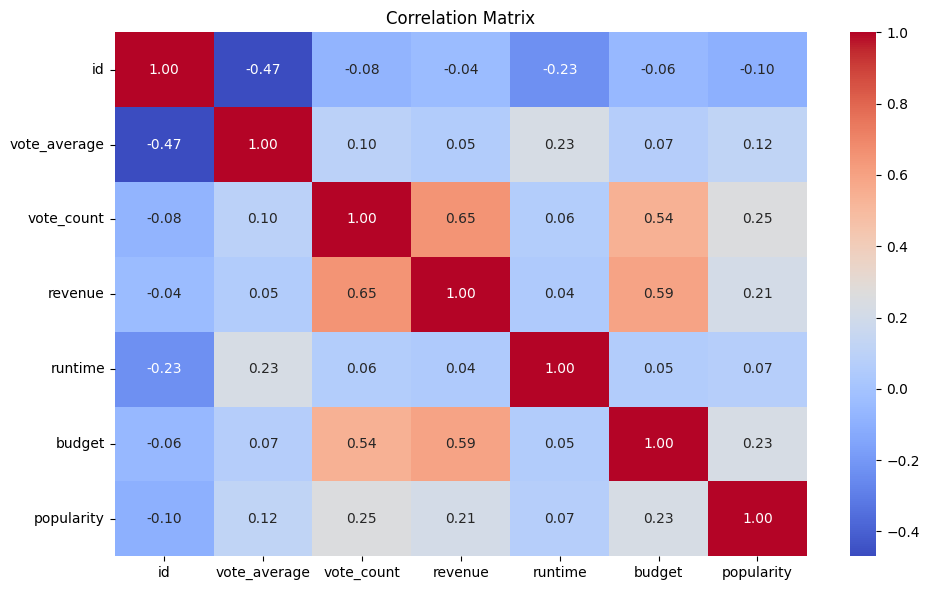

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# TIME SERIES ANALYSIS

In [87]:
#Converting the data into required data type

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [88]:
df = df.dropna(subset=['release_date', 'revenue'])

In [89]:
df['year_month'] = df['release_date'].dt.to_period('M')

C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\892817226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['release_date'].dt.to_period('M')


In [90]:
monthly_revenue = df.groupby('year_month')['revenue'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

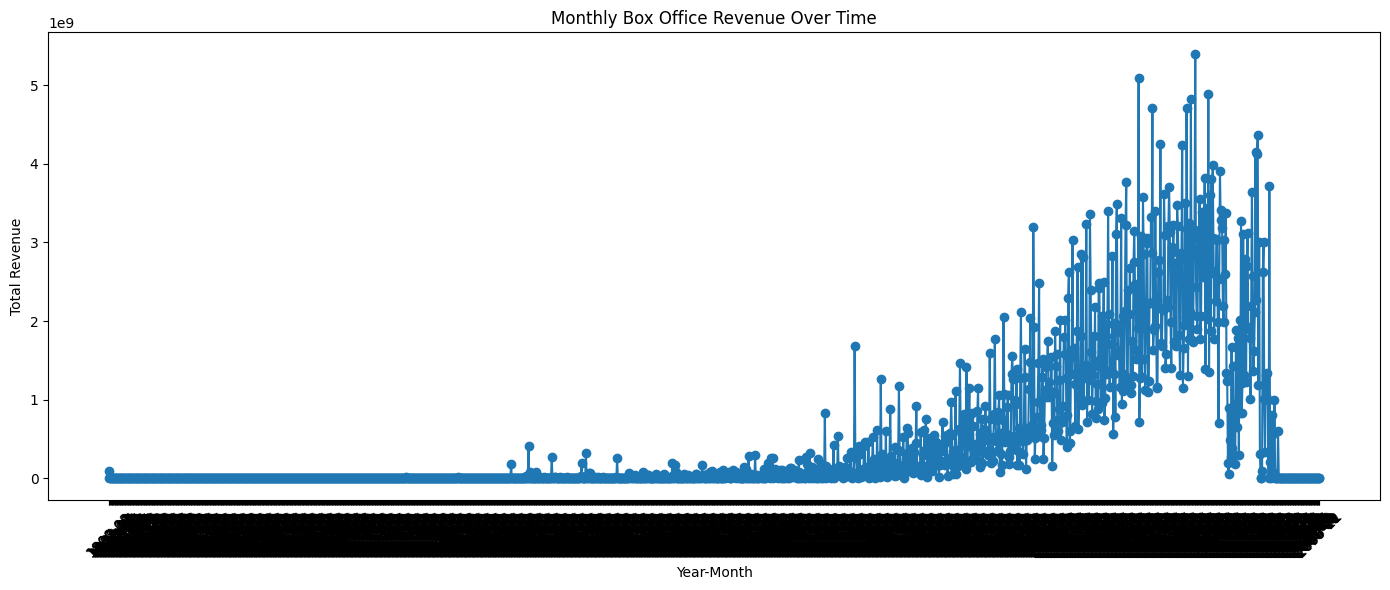

In [91]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['revenue'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Box Office Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# GENRE BASED ANALYSIS

In [92]:
df['genres_list'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
df_exploded = df.explode('genres_list')

C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\639156842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [93]:
df_exploded['revenue'] = pd.to_numeric(df_exploded['revenue'], errors='coerce')
df_exploded['budget'] = pd.to_numeric(df_exploded['budget'], errors='coerce')

In [94]:
df_exploded['profit'] = df_exploded['revenue'] - df_exploded['budget']

In [95]:
genre_stats = df_exploded.groupby('genres_list').agg(
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_profit=('profit', 'mean'),
    movie_count=('genres_list', 'count')
).sort_values(by='total_revenue', ascending=False).reset_index()

C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\43307737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='genres_list', y='total_revenue', palette='viridis')


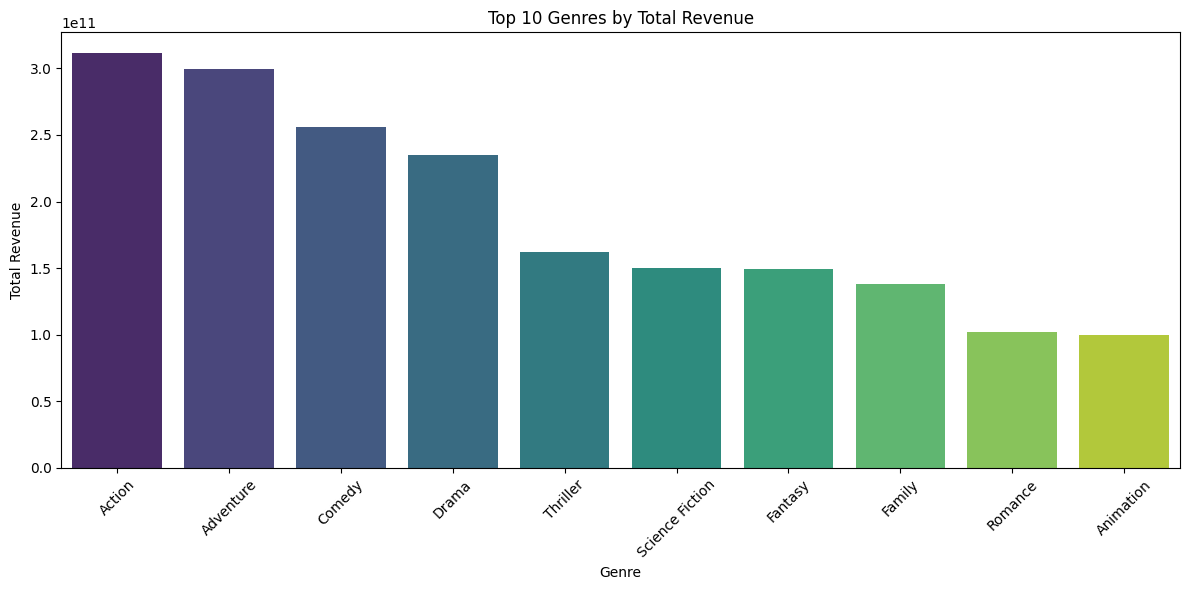

In [115]:
top_genres = genre_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='genres_list', y='total_revenue', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# PROFIT VS REVENUE PLOT

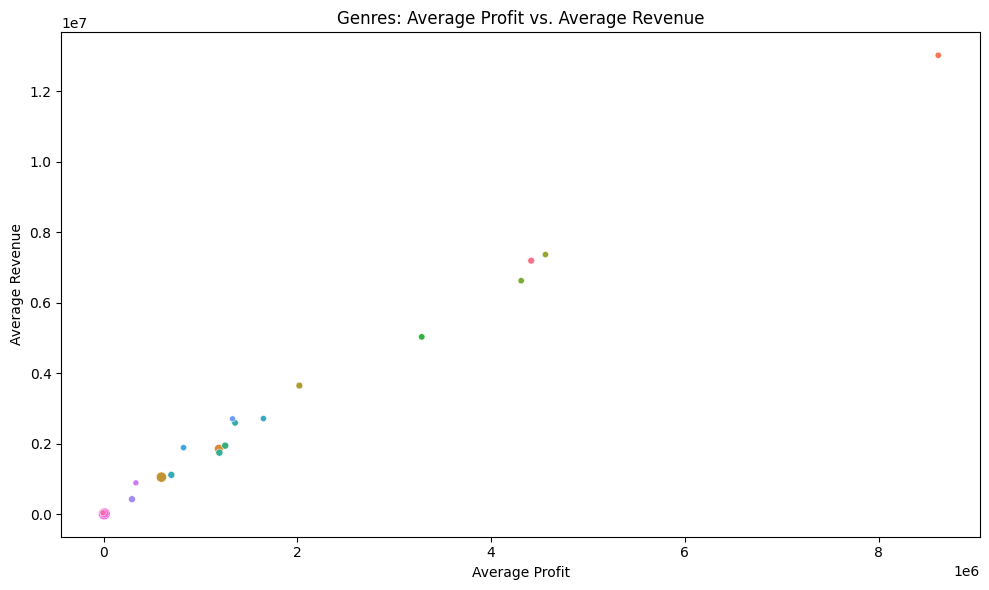

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_stats, x='avg_profit', y='avg_revenue', size='movie_count', hue='genres_list', legend=False)
plt.title('Genres: Average Profit vs. Average Revenue')
plt.xlabel('Average Profit')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()

# VISUALIZATION

Text(0.5, 1.0, 'Revenue')

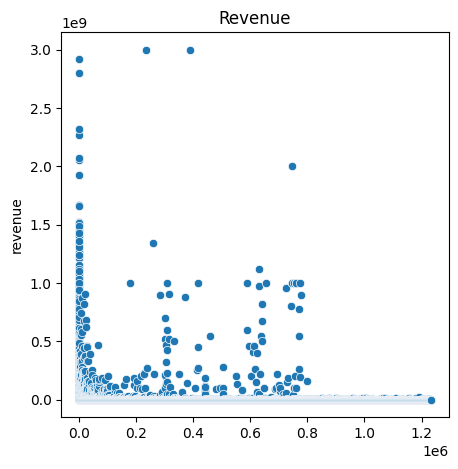

In [98]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['revenue'])
plt.title("Revenue")

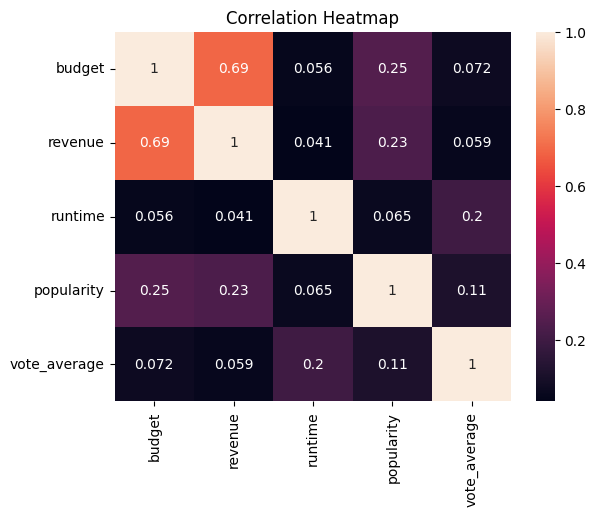

In [99]:
sns.heatmap(df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# FEATURE ENGINEERING


In [100]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['high_budget'] = (df['budget'] > 100_000_000).astype(int)
df['profit'] = df['revenue'] - df['budget']
df['roi'] = df['profit'] / df['budget'].replace(0, np.nan)

C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\1404593412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\1404593412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year
C:\Users\ayush\AppData\Local\Temp\ipykernel_11536\1404593412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [101]:
df['profit'].astype(float)

0          6.655328e+08
1          5.367292e+08
2          8.195584e+08
3          2.686706e+09
4          1.298816e+09
               ...     
1233745    0.000000e+00
1233746    0.000000e+00
1233747    0.000000e+00
1233748    0.000000e+00
1233749    0.000000e+00
Name: profit, Length: 1003886, dtype: float64

In [102]:
features = [
    'budget', 'runtime', 'popularity', 'vote_average',
    'vote_count', 'release_year', 'release_month', 'high_budget'
]
target = 'revenue'

In [103]:
model_df = df[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [106]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [107]:
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr=r2_lr*100
print("Linear Regression:\nRMSE:", rmse_lr, "\nR2:", r2_lr)

Linear Regression:
RMSE: 184114527274323.88 
R2: 0.5252158273732821


In [108]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [109]:
rmse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt=r2_dt*100
print("\nDecision Tree:\nRMSE:", rmse_dt, "\nR2:", r2_dt)


Decision Tree:
RMSE: 180696730773890.22 
R2: 0.5340294484801441


In [110]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [111]:
rmse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn=r2_knn*100
print("\nKNN:\nRMSE:", rmse_knn, "\nR2:", r2_knn)


KNN:
RMSE: 192129327929219.5 
R2: 0.5045477108805898


In [112]:
print("Linear Regression Accuracy: {:.2f}%".format(accuracy_lr))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt))
print("KNeighborsRegressor Accuracy: {:.2f}%".format(accuracy_knn))

Linear Regression Accuracy: 52.52%
Decision Tree Accuracy: 53.40%
KNeighborsRegressor Accuracy: 50.45%


In [113]:
test_data = np.array([[150_000_000, 130, 50.0, 7.2, 1200, 2023, 7, 1]])
test_df = pd.DataFrame(test_data, columns=features)
predicted_revenue = dt_model.predict(test_df)[0]

# Display formatted result
formatted_revenue = f"${predicted_revenue:,.0f}"
print("Predicted Revenue for Sample Movie (Decision Tree):", formatted_revenue)

Predicted Revenue for Sample Movie (Decision Tree): $139,830,098
